# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

## Read Libraries

In [1]:
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.neighbors import NearestNeighbors

from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds

import random


## Task 1: Load the Data

In [2]:
df_data = pd.read_excel("Online Retail.xlsx", dtype={"InvoiceNo":str, "StockCode":str, "Description":str, "CustomerID":str})
df_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


In [3]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


1454 sales have no product description and 135080 have no customer ID.

In [4]:
# Find the total price of each sale item

df_data["TotalPrice"] = df_data["Quantity"] * df_data["UnitPrice"]

## Task 2: Clean the Data

In [5]:
# Check if the stock codes and descriptions are one-to-one
code_to_desc = df_data.groupby("StockCode")["Description"].nunique()
code_to_desc = code_to_desc.sort_values(ascending=False)
display(code_to_desc)

non_unique_codes = code_to_desc[code_to_desc > 1].index.tolist()
print("There are {} products with non-unique descriptions".format(len(non_unique_codes)))

StockCode
20713     8
23084     7
21830     6
85175     6
23343     5
         ..
35969     0
20864     0
84664     0
20863     0
84964B    0
Name: Description, Length: 4070, dtype: int64

There are 650 products with non-unique descriptions


In [6]:
# Display descriptions for some of these stocks
for i, code in enumerate(code_to_desc.index):
    if i == 5:
        break
    
    display(code, df_data[df_data["StockCode"]==code]["Description"].value_counts())

'20713'

Description
JUMBO BAG OWLS                  673
wrongly marked. 23343 in box      1
wrongly coded-23343               1
found                             1
Found                             1
wrongly marked 23343              1
Marked as 23343                   1
wrongly coded 23343               1
Name: count, dtype: int64

'23084'

Description
RABBIT NIGHT LIGHT                     1051
temp adjustment                           1
allocate stock for dotcom orders ta       1
add stock to allocate online orders       1
for online retail orders                  1
Amazon                                    1
website fixed                             1
Name: count, dtype: int64

'21830'

Description
ASSORTED CREEPY CRAWLIES               105
MERCHANT CHANDLER CREDIT ERROR, STO      1
sold as 1                                1
?                                        1
damaged                                  1
OOPS ! adjustment                        1
Name: count, dtype: int64

'85175'

Description
CACTI T-LIGHT CANDLES    148
Amazon sold sets           1
dotcom sold sets           1
wrongly sold sets          1
? sold as sets?            1
check                      1
Name: count, dtype: int64

'23343'

Description
JUMBO BAG VINTAGE CHRISTMAS     496
wrongly coded 20713               2
came coded as 20713               1
20713 wrongly marked              1
20713                             1
Name: count, dtype: int64

### Correct Stock Code

Seems like most of the descriptions are correct, with minority being remarks to the sales. However, we notice that products 20713 and 23343 have some mislabelled entries. We should correct them.

In [7]:
# Correct wrongly input entries for 20713 and 23343

correction_map = {
    "20713": "23343",  # If "23343" appears in description, change 20713 → 23343
    "23343": "20713",  # If "20713" appears in description, change 23343 → 20713
}

def correct_product_code(row):
    original_code = row["StockCode"]
    description = row["Description"]

    if isinstance(description, str): # Entry is not null
        # print(original_code, description)
        
        if original_code in correction_map:
            correct_code = correction_map[original_code]
            if correct_code in description:  # If the code is in the description
                row["StockCode"] = correct_code
                row["Description"] += f" (MODIFIED FROM CODE {original_code})"
    
    return row

# Apply correction function to each row
df_data = df_data.apply(correct_product_code, axis=1)

for code in correction_map:
    display(code, df_data[df_data["StockCode"]==code]["Description"].value_counts())


'20713'

Description
JUMBO BAG OWLS                                     673
wrongly coded 20713 (MODIFIED FROM CODE 23343)       2
came coded as 20713 (MODIFIED FROM CODE 23343)       1
found                                                1
Found                                                1
20713 wrongly marked (MODIFIED FROM CODE 23343)      1
20713 (MODIFIED FROM CODE 23343)                     1
Name: count, dtype: int64

'23343'

Description
JUMBO BAG VINTAGE CHRISTMAS                                496
wrongly marked. 23343 in box (MODIFIED FROM CODE 20713)      1
wrongly coded-23343 (MODIFIED FROM CODE 20713)               1
wrongly marked 23343 (MODIFIED FROM CODE 20713)              1
Marked as 23343 (MODIFIED FROM CODE 20713)                   1
wrongly coded 23343 (MODIFIED FROM CODE 20713)               1
Name: count, dtype: int64

### Check Products without Descriptions

In [8]:
# Check for the transation volume of those without product description

df_temp = df_data[df_data["Description"].isna()]

display(df_temp["UnitPrice"].describe())

# It seems that all of them have 0 unit price, investigate the entries of these products
for i, code in enumerate(df_temp["StockCode"].unique()):
    if i == 5:
        break
    
    display(code, df_data[df_data["StockCode"]==code])

count    1454.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: UnitPrice, dtype: float64

'22139'

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
106,536381,22139,RETROSPOT TEA SET CERAMIC 11 PC,23,2010-12-01 09:41:00,4.25,15311,United Kingdom,97.75
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom,0.00
6392,536942,22139,amazon,15,2010-12-03 12:08:00,0.00,NaN,United Kingdom,0.00
6885,536982,22139,RETROSPOT TEA SET CERAMIC 11 PC,10,2010-12-03 14:27:00,11.02,NaN,United Kingdom,110.20
7203,537011,22139,NaN,-5,2010-12-03 15:38:00,0.00,NaN,United Kingdom,-0.00
...,...,...,...,...,...,...,...,...,...
538411,581405,22139,RETROSPOT TEA SET CERAMIC 11 PC,1,2011-12-08 13:50:00,4.95,13521,United Kingdom,4.95
539531,581439,22139,RETROSPOT TEA SET CERAMIC 11 PC,1,2011-12-08 16:30:00,10.79,NaN,United Kingdom,10.79
540441,581486,22139,RETROSPOT TEA SET CERAMIC 11 PC,6,2011-12-09 09:38:00,4.95,17001,United Kingdom,29.70
541387,581498,22139,RETROSPOT TEA SET CERAMIC 11 PC,2,2011-12-09 10:26:00,10.79,NaN,United Kingdom,21.58


'21134'

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom,0.0


'22145'

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom,0.0
19025,537827,22145,CHRISTMAS CRAFT HEART STOCKING,30,2010-12-08 14:43:00,2.1,15332,Lithuania,63.0
20392,538041,22145,NaN,30,2010-12-09 13:09:00,0.0,NaN,United Kingdom,0.0


'37509'

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.00,NaN,United Kingdom,0.00
9332,537199,37509,NEW ENGLAND MUG W GIFT BOX,1,2010-12-05 14:06:00,2.55,15894,United Kingdom,2.55
11603,537254,37509,NEW ENGLAND MUG W GIFT BOX,1,2010-12-06 11:01:00,2.55,15898,United Kingdom,2.55
21785,538136,37509,NaN,2,2010-12-09 15:57:00,0.00,NaN,United Kingdom,0.00


'85226A'

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom,0.0


For the products with no description, they all have 0 unit price. However, the products may come with a price in some entries. We may need to seek further clarification with the dataset owner.

### Check for Non-Product Entries

In [9]:
# It seems that most products are in the form of numeric digits. We will verify this

df_temp = df_data[~df_data["StockCode"].str.contains(r"\d", regex=True)]

for code in df_temp["StockCode"].unique():
    print(code, df_data[df_data["StockCode"] == code].shape)
    display(df_data[df_data["StockCode"] == code].head())

POST (1256, 9)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
45,536370,POST,POSTAGE,3,2010-12-01 08:45:00,18.0,12583,France,54.0
386,536403,POST,POSTAGE,1,2010-12-01 11:27:00,15.0,12791,Netherlands,15.0
1123,536527,POST,POSTAGE,1,2010-12-01 13:04:00,18.0,12662,Germany,18.0
5073,536840,POST,POSTAGE,1,2010-12-02 18:27:00,18.0,12738,Germany,18.0
5258,536852,POST,POSTAGE,1,2010-12-03 09:51:00,18.0,12686,France,18.0


D (77, 9)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom,-27.50
9038,C537164,D,Discount,-1,2010-12-05 13:21:00,29.29,14527,United Kingdom,-29.29
14498,C537597,D,Discount,-1,2010-12-07 12:34:00,281.00,15498,United Kingdom,-281.00
19392,C537857,D,Discount,-1,2010-12-08 16:00:00,267.12,17340,United Kingdom,-267.12
31134,C538897,D,Discount,-1,2010-12-15 09:14:00,5.76,16422,United Kingdom,-5.76


DOT (710, 9)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
1814,536544,DOT,DOTCOM POSTAGE,1,2010-12-01 14:32:00,569.77,NaN,United Kingdom,569.77
3041,536592,DOT,DOTCOM POSTAGE,1,2010-12-01 17:06:00,607.49,NaN,United Kingdom,607.49
5450,536862,DOT,DOTCOM POSTAGE,1,2010-12-03 11:13:00,254.43,NaN,United Kingdom,254.43
5545,536864,DOT,DOTCOM POSTAGE,1,2010-12-03 11:27:00,121.06,NaN,United Kingdom,121.06
5685,536865,DOT,DOTCOM POSTAGE,1,2010-12-03 11:28:00,498.47,NaN,United Kingdom,498.47


M (571, 9)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
2239,536569,M,Manual,1,2010-12-01 15:35:00,1.25,16274,United Kingdom,1.25
2250,536569,M,Manual,1,2010-12-01 15:35:00,18.95,16274,United Kingdom,18.95
5684,536865,M,Manual,1,2010-12-03 11:28:00,2.55,NaN,United Kingdom,2.55
6798,536981,M,Manual,2,2010-12-03 14:26:00,0.85,14723,United Kingdom,1.70
7976,537077,M,Manual,12,2010-12-05 11:59:00,0.42,17062,United Kingdom,5.04


BANK CHARGES (37, 9)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
4406,536779,BANK CHARGES,Bank Charges,1,2010-12-02 15:08:00,15.00,15823,United Kingdom,15.00
14435,C537572,BANK CHARGES,Bank Charges,-1,2010-12-07 12:00:00,95.38,NaN,United Kingdom,-95.38
28992,C538680,BANK CHARGES,Bank Charges,-1,2010-12-13 17:10:00,966.92,NaN,United Kingdom,-966.92
62508,541505,BANK CHARGES,Bank Charges,1,2011-01-18 15:58:00,15.00,15939,United Kingdom,15.00
64573,C541653,BANK CHARGES,Bank Charges,-1,2011-01-20 11:50:00,1050.15,NaN,United Kingdom,-1050.15


S (63, 9)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
14436,C537581,S,SAMPLES,-1,2010-12-07 12:03:00,12.95,NaN,United Kingdom,-12.95
14437,C537581,S,SAMPLES,-1,2010-12-07 12:03:00,52.00,NaN,United Kingdom,-52.00
96680,C544580,S,SAMPLES,-1,2011-02-21 14:25:00,5.74,NaN,United Kingdom,-5.74
96681,C544580,S,SAMPLES,-1,2011-02-21 14:25:00,11.08,NaN,United Kingdom,-11.08
96682,C544580,S,SAMPLES,-1,2011-02-21 14:25:00,5.79,NaN,United Kingdom,-5.79


AMAZONFEE (34, 9)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
14514,C537600,AMAZONFEE,AMAZON FEE,-1,2010-12-07 12:41:00,1.00,NaN,United Kingdom,-1.00
15016,C537630,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:04:00,13541.33,NaN,United Kingdom,-13541.33
15017,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08:00,13541.33,NaN,United Kingdom,13541.33
16232,C537644,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:34:00,13474.79,NaN,United Kingdom,-13474.79
16313,C537647,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:41:00,5519.25,NaN,United Kingdom,-5519.25


m (1, 9)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
40383,539736,m,Manual,1,2010-12-21 15:18:00,2.55,NaN,United Kingdom,2.55


DCGSSBOY (11, 9)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
84016,543358,DCGSSBOY,BOYS PARTY BAG,1,2011-02-07 14:04:00,3.29,NaN,United Kingdom,3.29
97246,544599,DCGSSBOY,BOYS PARTY BAG,1,2011-02-21 18:15:00,3.29,NaN,United Kingdom,3.29
112723,545897,DCGSSBOY,BOYS PARTY BAG,5,2011-03-07 17:22:00,3.29,NaN,United Kingdom,16.45
116891,546306,DCGSSBOY,BOYS PARTY BAG,1,2011-03-10 16:16:00,3.29,NaN,United Kingdom,3.29
128107,547249,DCGSSBOY,BOYS PARTY BAG,6,2011-03-22 09:27:00,3.29,NaN,United Kingdom,19.74


DCGSSGIRL (13, 9)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
84017,543358,DCGSSGIRL,GIRLS PARTY BAG,3,2011-02-07 14:04:00,3.29,NaN,United Kingdom,9.87
112724,545897,DCGSSGIRL,GIRLS PARTY BAG,5,2011-03-07 17:22:00,3.29,NaN,United Kingdom,16.45
116892,546306,DCGSSGIRL,GIRLS PARTY BAG,2,2011-03-10 16:16:00,3.29,NaN,United Kingdom,6.58
128108,547249,DCGSSGIRL,GIRLS PARTY BAG,17,2011-03-22 09:27:00,3.29,NaN,United Kingdom,55.93
128269,547250,DCGSSGIRL,GIRLS PARTY BAG,2,2011-03-22 09:30:00,3.29,NaN,United Kingdom,6.58


PADS (4, 9)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
157195,550193,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-04-15 09:27:00,0.001,13952,United Kingdom,0.001
279045,561226,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-07-26 10:13:00,0.001,15618,United Kingdom,0.001
358655,568158,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-09-25 12:22:00,0.000,16133,United Kingdom,0.000
359871,568200,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-09-25 14:58:00,0.001,16198,United Kingdom,0.001


B (3, 9)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom,11062.06
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom,-11062.06
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom,-11062.06


CRUK (16, 9)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
317508,C564763,CRUK,CRUK Commission,-1,2011-08-30 10:49:00,1.60,14096,United Kingdom,-1.60
324023,C565382,CRUK,CRUK Commission,-1,2011-09-02 15:45:00,13.01,14096,United Kingdom,-13.01
333779,C566216,CRUK,CRUK Commission,-1,2011-09-09 15:17:00,15.96,14096,United Kingdom,-15.96
338848,C566565,CRUK,CRUK Commission,-1,2011-09-13 12:32:00,52.24,14096,United Kingdom,-52.24
351003,C567655,CRUK,CRUK Commission,-1,2011-09-21 14:40:00,608.66,14096,United Kingdom,-608.66


In [10]:
# We identify the following StockCode that are not products but miscalleneous charges
non_product_code = ["POST", "D", "DOT", "M", "BANK CHARGES", "S", "AMAZONFEE", "m", "B", "CRUK"]

# Remove this so we can focus on product sales analysis
df_data = df_data[~df_data["StockCode"].isin(non_product_code)]

### Check for Invalid Sales

In [11]:
# Check for negative quantity or unit price

df_temp = df_data[df_data["UnitPrice"] < 0]
print("Negative Unit Price")
display(df_temp)

df_temp = df_data[df_data["Quantity"] < 0]
print("Negative Quantity")
display(df_temp)

# It seems that all negative quantity comes from invoices starting with "C". Verify this

df_temp = df_data[df_data["InvoiceNo"].str.contains("C")]
print("Total Price distribution of Invoice C")
display(df_temp["TotalPrice"].describe())

df_temp = df_data[~df_data["InvoiceNo"].str.contains("C")]
print("Total Price distribution of Invoice without C")
display(df_temp[df_temp["Quantity"] < 0]["TotalPrice"].describe())


Negative Unit Price


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice


Negative Quantity


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,-6.96
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,-6.96
...,...,...,...,...,...,...,...,...,...
540448,C581490,22178,VICTORIAN GLASS HANGING T-LIGHT,-12,2011-12-09 09:57:00,1.95,14397,United Kingdom,-23.40
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397,United Kingdom,-9.13
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311,United Kingdom,-54.75
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315,United Kingdom,-1.25


Total Price distribution of Invoice C


count      8706.000000
mean        -54.995311
std        1990.938704
min     -168469.600000
25%         -16.600000
50%          -8.400000
75%          -3.300000
max          -0.120000
Name: TotalPrice, dtype: float64

Total Price distribution of Invoice without C


count    1336.0
mean        0.0
std         0.0
min        -0.0
25%        -0.0
50%        -0.0
75%         0.0
max        -0.0
Name: TotalPrice, dtype: float64

Investigating the negative quantity reveals that they are all from invoices starting with "C", which may indicate **cancelled / returned sales**.

All regular invoices with negative quantity have 0 unit price, which contributes to 0 total price. We may need to clarify with data owner why it is so.

### Dropping Duplicated Rows

In [12]:
print("There are {} duplicated rows".format(df_data.duplicated().sum()))

df_data = df_data.drop_duplicates()

print(df_data.shape)

There are 5262 duplicated rows
(533879, 9)


## Task 3: Explore the Data

In [13]:
# Separate the dataset into sales and cancellation
df_sales = df_data[~df_data["InvoiceNo"].str.contains("C")]
df_cancel = df_data[df_data["InvoiceNo"].str.contains("C")]

### Cancellation

In [14]:
total_invoice = df_data["InvoiceNo"].nunique()
cancel_invoice = df_cancel["InvoiceNo"].nunique()

total_sales = df_sales["TotalPrice"].sum() # Use df_sales instead of df_data to understand how much of the actual sales were cancelled
cancel_sales = df_cancel["TotalPrice"].sum()

print("Number of cancelled invoice: {}; Percentage: {:.3f}%".format(cancel_invoice, cancel_invoice / total_invoice *100))
print("Total cancelled sales: ${}; Percentage: {:.3f}%".format(-cancel_sales, -cancel_sales / total_sales *100))

Number of cancelled invoice: 3422; Percentage: 13.524%
Total cancelled sales: $475966.16000000003; Percentage: 4.641%


With more than 13% of the invoice cancelled, contributing to **$475k or 4.64% of cancelled sales**, it is necessary to further understand the sales details to take targeted intervention.

### Customer Profile

#### Customer

In [15]:
print("Total number of customers: {}".format(df_data["CustomerID"].nunique()))
print("Total number of cancelled customers: {}".format(df_cancel["CustomerID"].nunique()))

Total number of customers: 4363
Total number of cancelled customers: 1534


##### Invoice

In [16]:
# Find how many transactions each customer perform

df_temp = df_sales.groupby("CustomerID")["InvoiceNo"].nunique().reset_index()
df_temp_2 = df_cancel.groupby("CustomerID")["InvoiceNo"].nunique().reset_index()

customer_invoice_count = pd.merge(df_temp, df_temp_2, on="CustomerID", how="outer")
customer_invoice_count.columns = ["CustomerID", "SalesInvoice", "CancelledInvoice"]
customer_invoice_count = customer_invoice_count.fillna(0)

display(customer_invoice_count.describe())

,SalesInvoice,CancelledInvoice
count,4363.000000,4363.000000
mean,4.219115,0.775384
std,7.626851,1.964604
min,0.000000,0.000000
25%,1.000000,0.000000
50%,2.000000,0.000000
75%,5.000000,1.000000
max,206.000000,45.000000


On average each customer performs **4** transaction but cancel **1** of them.

c:\Users\mjeat\anaconda3\envs\mle\Lib\site-packages\matplotlib\axes\_axes.py:7037: RuntimeWarning: invalid value encountered in multiply
  boffset = -0.5 * dr * totwidth * (1 - 1 / nx)


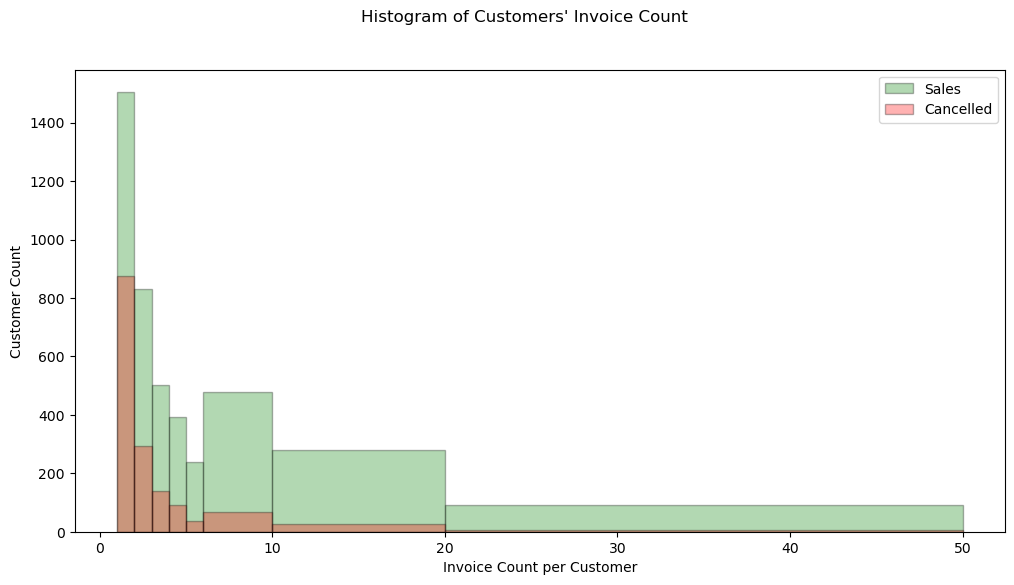

In [17]:
fig, axs = plt.subplots(figsize=(12,6))

# bins = np.histogram_bin_edges(np.concatenate([customer_invoice_count["SalesInvoice"], customer_invoice_count["CancelledInvoice"]]), bins=200)
bins = [1, 2, 3, 4, 5, 6, 10, 20, 50, np.inf]

axs.hist(customer_invoice_count["SalesInvoice"], bins=bins, color='g', alpha=0.3, edgecolor='k', label="Sales")
axs.hist(customer_invoice_count["CancelledInvoice"], bins=bins, color='r', alpha=0.3, edgecolor='k', label="Cancelled")

axs.legend()

fig.suptitle("Histogram of Customers' Invoice Count")
axs.set_xlabel("Invoice Count per Customer")
axs.set_ylabel("Customer Count");

The invoice distribution is **skewed** in such that most customers perform **less than 5 transactions / invoices**.

##### Product

In [18]:
# Find how many unique products each customer purchase / cancel

df_temp = df_sales.groupby("CustomerID")["StockCode"].nunique().reset_index()
df_temp_2 = df_cancel.groupby("CustomerID")["StockCode"].nunique().reset_index()

customer_product_count = pd.merge(df_temp, df_temp_2, on="CustomerID", how="outer")
customer_product_count.columns = ["CustomerID", "SalesProducts", "CancelledProducts"]
customer_product_count = customer_product_count.fillna(0)

display(customer_product_count.describe())

,SalesProducts,CancelledProducts
count,4363.000000,4363.000000
mean,61.026587,1.735045
std,85.177175,5.870092
min,0.000000,0.000000
25%,15.000000,0.000000
50%,35.000000,0.000000
75%,77.000000,1.000000
max,1786.000000,185.000000


On average each customer purchase **61** unique products but cancel **2** of them.

c:\Users\mjeat\anaconda3\envs\mle\Lib\site-packages\matplotlib\axes\_axes.py:7037: RuntimeWarning: invalid value encountered in multiply
  boffset = -0.5 * dr * totwidth * (1 - 1 / nx)


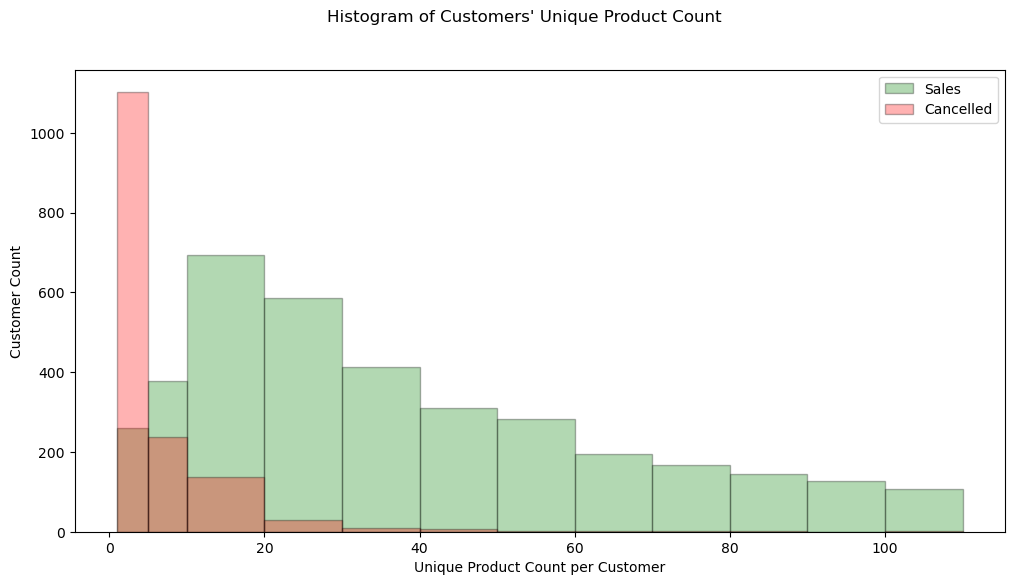

In [19]:
fig, axs = plt.subplots(figsize=(12,6))

bins = [1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, np.inf]

axs.hist(customer_product_count["SalesProducts"], bins=bins, color='g', alpha=0.3, edgecolor='k', label="Sales")
axs.hist(customer_product_count["CancelledProducts"], bins=bins, color='r', alpha=0.3, edgecolor='k', label="Cancelled")

axs.legend()

fig.suptitle("Histogram of Customers' Unique Product Count")
axs.set_xlabel("Unique Product Count per Customer")
axs.set_ylabel("Customer Count");

The unique product distribution is **skewed**, especially for the cancelled sales. More than 75% of the customers only return 1 unique product.

### Products

##### Number of Product per Order

In [20]:
unique_product_sales = df_sales.groupby(["CustomerID", "InvoiceNo"])["StockCode"].nunique()
print("Number of unique products in each sales invoice")
display(unique_product_sales.describe())

number_product_sales = df_sales.groupby(["CustomerID", "InvoiceNo"])["Quantity"].sum()
print("Number of products in each sales invoice")
display(number_product_sales.describe())

unique_product_cancel = df_cancel.groupby(["CustomerID", "InvoiceNo"])["StockCode"].nunique()
print("Number of unique products in each cancelled invoice")
display(unique_product_cancel.describe())

number_product_cancel = df_cancel.groupby(["CustomerID", "InvoiceNo"])["Quantity"].sum()
print("Number of products in each cancelled invoice")
display(number_product_cancel.describe())

Number of unique products in each sales invoice


count    18408.000000
mean        20.995817
std         23.817690
min          1.000000
25%          7.000000
50%         15.000000
75%         27.000000
max        540.000000
Name: StockCode, dtype: float64

Number of products in each sales invoice


count    18408.000000
mean       280.084691
std        979.223650
min          1.000000
25%         75.000000
50%        156.000000
75%        291.000000
max      80995.000000
Name: Quantity, dtype: float64

Number of unique products in each cancelled invoice


count    3383.000000
mean        2.505469
std         3.786810
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max       101.000000
Name: StockCode, dtype: float64

Number of products in each cancelled invoice


count     3383.000000
mean       -79.134496
std       1906.654105
min     -80995.000000
25%        -12.000000
50%         -4.000000
75%         -2.000000
max         -1.000000
Name: Quantity, dtype: float64

In each sales inoivce, there are **21 unique products and 280 products** sold.
In each cancelled inoivce, there are **2 unique products and 79 products** cancelled.

The data show that while there are not many unique products being cancelled, the quantity of the items returned can be high.

#### Price-Sales Correlation

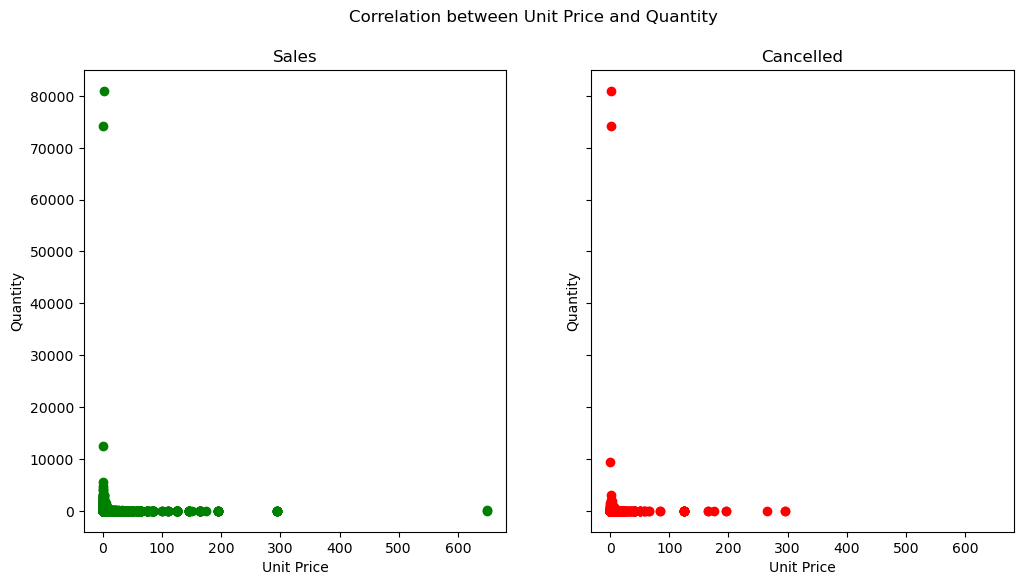

In [21]:
# Find the correlation with sales and unit price to see if cheaper products lead to better sales

df_sales_filter = df_sales[df_sales["Quantity"] >= 0] # Entries with negative quantity have 0 unit price
df_cancel_filter = df_cancel[df_cancel["Quantity"] <= 0]

fig, axs = plt.subplots(1, 2, figsize=(12,6), sharex=True, sharey=True)
fig.suptitle("Correlation between Unit Price and Quantity")

axs[0].scatter(df_sales_filter["UnitPrice"], df_sales_filter["Quantity"], c='g')
axs[0].set_title("Sales")

axs[1].scatter(df_cancel_filter["UnitPrice"], -df_cancel_filter["Quantity"], c='r')
axs[1].set_title("Cancelled")

for ax in axs:
    ax.set_xlabel("Unit Price")
    ax.set_ylabel("Quantity")

In [22]:
# Examine the two outliers

display(df_sales[df_sales["Quantity"] > 10000])
display(df_cancel[df_cancel["Quantity"] < -10000])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom,77183.6
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,13256,United Kingdom,0.0
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446,United Kingdom,168469.6


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346,United Kingdom,-77183.6
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446,United Kingdom,-168469.6


Examining the invoices with the most quantity, it is found that these invoice were made and cancelled within a short time frame, potentially due to buyers mistake in ordering. **We eliminate these two entries and study their correlation again.**

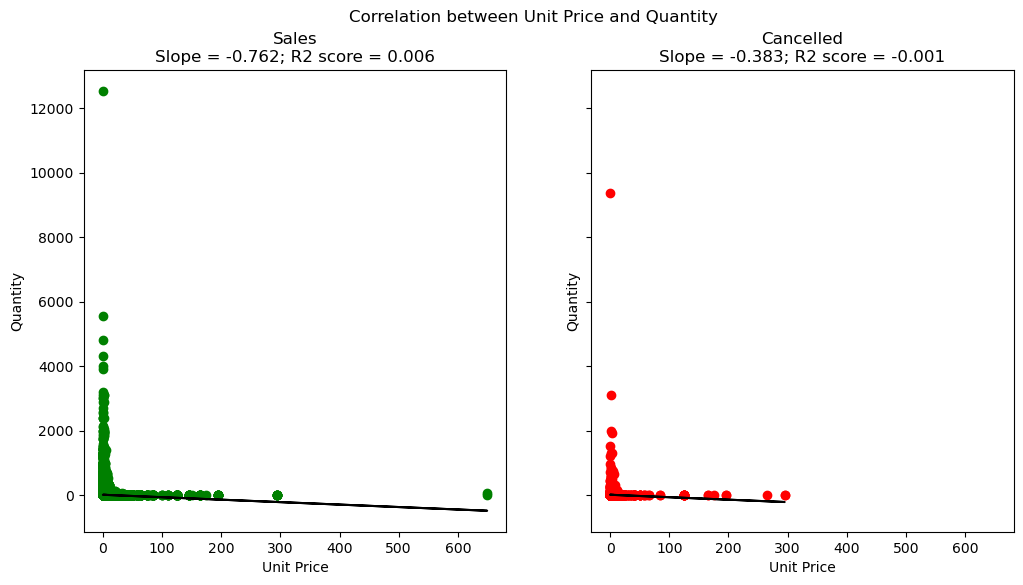

In [23]:
# Find the correlation with sales and unit price

df_sales_filter = df_sales[ (df_sales["Quantity"] >= 0) & (~df_sales["InvoiceNo"].isin(["541431", "581483"]))]
df_cancel_filter = df_cancel[ (df_cancel["Quantity"] <= 0) & (~df_cancel["InvoiceNo"].isin(["C541433", "C581484"]))]

# Find the line of best fit
model = LinearRegression()
model.fit(df_sales_filter["UnitPrice"].values.reshape(-1, 1), df_sales_filter["Quantity"])
y_pred = model.predict(df_sales_filter["UnitPrice"].values.reshape(-1, 1))
slope = model.coef_[0]
r2 = r2_score(df_sales_filter["Quantity"], y_pred)
model_2 = LinearRegression()
model_2.fit(df_cancel_filter["UnitPrice"].values.reshape(-1, 1), -df_cancel_filter["Quantity"])
y_pred_2 = model.predict(df_cancel_filter["UnitPrice"].values.reshape(-1, 1))
slope_2 = model_2.coef_[0]
r2_2 = r2_score(-df_cancel_filter["Quantity"], y_pred_2)

'''
# Attempted fitting an exponential curve due to the visuals of the scatter plot
# But fitting is unsuccessful
def exp_func(x, a, b, c):
    return a * np.exp(b * x) + c

params, _ = curve_fit(exp_func, df_sales_filter["UnitPrice"], df_sales_filter["Quantity"])
y_pred = exp_func(df_sales_filter["UnitPrice"], *params)
params_2, _ = curve_fit(exp_func, df_cancel_filter["UnitPrice"], -df_cancel_filter["Quantity"])
y_pred_2 = exp_func(df_cancel_filter["UnitPrice"], *params_2)
'''

# Plots
fig, axs = plt.subplots(1, 2, figsize=(12,6), sharex=True, sharey=True)
fig.suptitle("Correlation between Unit Price and Quantity")

axs[0].scatter(df_sales_filter["UnitPrice"], df_sales_filter["Quantity"], c='g')
axs[0].set_title("Sales\nSlope = {}; R2 score = {}".format(round(slope, 3), round(r2, 3)))
axs[0].plot(df_sales_filter["UnitPrice"], y_pred, color="k")

axs[1].scatter(df_cancel_filter["UnitPrice"], -df_cancel_filter["Quantity"], c='r')
axs[1].set_title("Cancelled\nSlope = {}; R2 score = {}".format(round(slope_2, 3), round(r2_2, 3)))
axs[1].plot(df_cancel_filter["UnitPrice"], y_pred_2, color="k")

for ax in axs:
    ax.set_xlabel("Unit Price")
    ax.set_ylabel("Quantity")

While it is expected that low unit price will lead to higher quantity, and thus higher sales, the data show otherwise. Unit price and sold quantity have a **negative correlation**, albeit the **R2 scores are too low** for models to be significant.

#### Identifying Top Products

In [24]:
# Split using price percentiles of 0-10%, 10-20%, ... instead of using analysing the entire spectrum as different products may have different sales patterns

bin_edges = pd.qcut(df_sales_filter["UnitPrice"], q=10, retbins=True)[1]  # Extract bin edges
bin_labels = [f"{bin_edges[i]}-{bin_edges[i+1]}" for i in range(len(bin_edges)-1)]

df_sales_filter["PriceRange"] = pd.qcut(df_sales_filter["UnitPrice"], q=10, labels=bin_labels)
df_cancel_filter["PriceRange"] = pd.cut(df_cancel_filter["UnitPrice"], bins=bin_edges, labels=bin_labels, include_lowest=True)

for bin_label in bin_labels:
    df_temp = df_sales_filter[df_sales_filter["PriceRange"]==bin_label]
    df_temp_2 = df_cancel_filter[df_cancel_filter["PriceRange"]==bin_label]

    df_temp = df_temp.groupby("StockCode")["Quantity"].sum().sort_values(ascending=False).reset_index()
    df_temp_2 = df_temp_2.groupby("StockCode")["Quantity"].sum().sort_values(ascending=True).reset_index()

    df_temp["QuantityPercentage"]  = df_temp["Quantity"] / df_temp["Quantity"].sum() * 100
    df_temp_2["QuantityPercentage"]  = df_temp_2["Quantity"] / df_temp_2["Quantity"].sum() * 100
    
    # Top n products
    n = 10

    print(r"Top {} products in sales (Price Range: {}). They contribute to {:.2f}% of the total count." \
          .format(n, bin_label, df_temp.iloc[:n]["QuantityPercentage"].sum()))
    display(df_temp.iloc[:n])
    print("Top {} products in cancellation (Price Range: {}). They contribute to {:.2f}% of the total count.". \
          format(n, bin_label, df_temp_2.iloc[:n]["QuantityPercentage"].sum()))
    display(df_temp_2.iloc[:n])

Top 10 products in sales (Price Range: 0.0-0.65). They contribute to 16.42% of the total count.


C:\Users\mjeat\AppData\Local\Temp\ipykernel_10952\919292705.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sales_filter["PriceRange"] = pd.qcut(df_sales_filter["UnitPrice"], q=10, labels=bin_labels)
C:\Users\mjeat\AppData\Local\Temp\ipykernel_10952\919292705.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cancel_filter["PriceRange"] = pd.cut(df_cancel_filter["UnitPrice"], bins=bin_edges, labels=bin_labels, include_lowest=True)


,StockCode,Quantity,QuantityPercentage
0,84077,54951,3.593443
1,21212,33933,2.219000
2,22492,26186,1.712396
3,22616,25552,1.670937
4,21977,24466,1.599919
5,17003,22992,1.503529
6,84991,17802,1.164137
7,84755,15621,1.021513
8,22151,14874,0.972664
9,22952,14785,0.966844


Top 10 products in cancellation (Price Range: 0.0-0.65). They contribute to 60.34% of the total count.


,StockCode,Quantity,QuantityPercentage
0,84347,-9360,33.033351
1,22920,-1527,5.389095
2,15034,-1385,4.887948
3,84077,-1200,4.235045
4,22151,-890,3.140992
5,22102,-720,2.541027
6,15036,-600,2.117522
7,20974,-566,1.997530
8,22103,-468,1.651668
9,21212,-380,1.341098


Top 10 products in sales (Price Range: 0.65-0.85). They contribute to 24.55% of the total count.


,StockCode,Quantity,QuantityPercentage
0,22197,49588,7.934143
1,15036,17238,2.758102
2,71459,13269,2.123057
3,20724,12849,2.055856
4,21790,12104,1.936655
5,21080,11568,1.850895
6,84945,10221,1.635373
7,20719,9270,1.483212
8,22355,8988,1.438092
9,22741,8326,1.332171


Top 10 products in cancellation (Price Range: 0.65-0.85). They contribute to 32.27% of the total count.


,StockCode,Quantity,QuantityPercentage
0,23167,-525,5.380201
1,22197,-471,4.826809
2,21787,-384,3.935233
3,20733,-300,3.074400
4,22356,-266,2.725968
5,22909,-259,2.654232
6,22945,-258,2.643984
7,22922,-234,2.398032
8,22924,-229,2.346792
9,20724,-223,2.285304


Top 10 products in sales (Price Range: 0.85-1.25). They contribute to 18.41% of the total count.


,StockCode,Quantity,QuantityPercentage
0,21915,20976,2.907583
1,22178,17767,2.462768
2,84946,16608,2.302114
3,22693,16014,2.219776
4,22993,11266,1.561634
5,84978,11115,1.540703
6,21232,10393,1.440623
7,20971,10191,1.412623
8,23077,9713,1.346365
9,22988,8776,1.216483


Top 10 products in cancellation (Price Range: 0.85-1.25). They contribute to 40.57% of the total count.


,StockCode,Quantity,QuantityPercentage
0,20971,-1321,8.009459
1,21877,-1033,6.263263
2,22147,-840,5.093070
3,21069,-701,4.250288
4,21871,-665,4.032014
5,72802C,-504,3.055842
6,22564,-437,2.649609
7,21439,-408,2.473777
8,72802B,-398,2.413145
9,21232,-384,2.328260


Top 10 products in sales (Price Range: 1.25-1.65). They contribute to 18.32% of the total count.


,StockCode,Quantity,QuantityPercentage
0,20725,17814,2.629850
1,84879,13432,1.982943
2,23209,13036,1.924482
3,21731,11932,1.761501
4,22383,11732,1.731975
5,23206,11581,1.709683
6,22469,11426,1.686801
7,20727,11295,1.667461
8,22961,11007,1.624944
9,20728,10855,1.602505


Top 10 products in cancellation (Price Range: 1.25-1.65). They contribute to 38.78% of the total count.


,StockCode,Quantity,QuantityPercentage
0,23170,-718,6.323206
1,22991,-688,6.059005
2,22992,-676,5.953325
3,20725,-574,5.055042
4,23207,-448,3.945399
5,22561,-276,2.430647
6,22493,-273,2.404227
7,22659,-273,2.404227
8,84949,-263,2.316160
9,20728,-214,1.884632


Top 10 products in sales (Price Range: 1.65-2.08). They contribute to 34.44% of the total count.


,StockCode,Quantity,QuantityPercentage
0,85099B,36966,7.014554
1,23084,27077,5.138048
2,84879,22434,4.257007
3,23203,19061,3.616957
4,22386,16937,3.213913
5,23199,13457,2.553559
6,85099F,12723,2.414277
7,23201,12345,2.342549
8,23202,10414,1.976129
9,85099C,10084,1.913509


Top 10 products in cancellation (Price Range: 1.65-2.08). They contribute to 53.56% of the total count.


,StockCode,Quantity,QuantityPercentage
0,21175,-2002,15.640625
1,85099B,-990,7.734375
2,23199,-723,5.648438
3,22149,-600,4.687500
4,23201,-594,4.640625
5,23203,-590,4.609375
6,22386,-456,3.562500
7,21931,-334,2.609375
8,18097C,-288,2.250000
9,85099C,-279,2.179688


Top 10 products in sales (Price Range: 2.08-2.55). They contribute to 19.66% of the total count.


,StockCode,Quantity,QuantityPercentage
0,85123A,21960,5.112541
1,22086,9929,2.311586
2,22355,8567,1.994496
3,22467,7609,1.771463
4,21108,6949,1.617807
5,21181,6733,1.567520
6,82482,6022,1.401991
7,22189,5622,1.308866
8,22910,5596,1.302813
9,84347,5477,1.275109


Top 10 products in cancellation (Price Range: 2.08-2.55). They contribute to 67.39% of the total count.


,StockCode,Quantity,QuantityPercentage
0,21108,-3132,19.966849
1,85123A,-2452,15.631774
2,22273,-1440,9.180161
3,47566B,-1300,8.287645
4,22328,-624,3.978070
5,22086,-440,2.805049
6,22699,-347,2.212164
7,82494L,-326,2.078286
8,22910,-260,1.657529
9,22313,-250,1.593778


Top 10 products in sales (Price Range: 2.55-3.75). They contribute to 18.54% of the total count.


,StockCode,Quantity,QuantityPercentage
0,85123A,15202,3.727936
1,21137,11408,2.797546
2,22470,7990,1.959361
3,22727,7207,1.767349
4,71477,6185,1.516727
5,22086,6051,1.483867
6,22457,5928,1.453704
7,22726,5625,1.379400
8,21733,5356,1.313434
9,22728,4661,1.143001


Top 10 products in cancellation (Price Range: 2.55-3.75). They contribute to 35.34% of the total count.


,StockCode,Quantity,QuantityPercentage
0,71477,-1188,15.590551
1,22570,-245,3.215223
2,21035,-200,2.624672
3,22569,-194,2.545932
4,21479,-184,2.414698
5,22568,-158,2.073491
6,85071A,-152,1.994751
7,20969,-145,1.902887
8,85123A,-126,1.653543
9,22173,-101,1.325459


Top 10 products in sales (Price Range: 3.75-4.95). They contribute to 23.87% of the total count.


,StockCode,Quantity,QuantityPercentage
0,47566,14432,5.227754
1,79321,8464,3.065945
2,23298,7829,2.835926
3,22720,6166,2.233532
4,23245,5855,2.120877
5,23355,5385,1.950628
6,22112,5274,1.910420
7,22138,4388,1.589481
8,22139,4277,1.549273
9,22960,3832,1.388079


Top 10 products in cancellation (Price Range: 3.75-4.95). They contribute to 38.75% of the total count.


,StockCode,Quantity,QuantityPercentage
0,22835,-394,8.186162
1,47566,-257,5.339705
2,85232B,-255,5.298151
3,22960,-164,3.407438
4,22720,-154,3.199668
5,72807C,-134,2.784126
6,21843,-132,2.742572
7,22112,-128,2.659464
8,22990,-126,2.617910
9,15056BL,-121,2.514025


Top 10 products in sales (Price Range: 4.95-7.62). They contribute to 17.03% of the total count.


,StockCode,Quantity,QuantityPercentage
0,22086,3349,2.421127
1,23284,2933,2.120384
2,21754,2641,1.909285
3,21623,2600,1.879645
4,23108,2170,1.568781
5,82483,2088,1.509499
6,22427,2010,1.453110
7,23243,1953,1.411902
8,21755,1925,1.391660
9,15056N,1889,1.365634


Top 10 products in cancellation (Price Range: 4.95-7.62). They contribute to 70.39% of the total count.


,StockCode,Quantity,QuantityPercentage
0,23113,-942,25.542299
1,48185,-670,18.167028
2,23056,-291,7.890456
3,23284,-216,5.856833
4,82483,-190,5.151844
5,20685,-65,1.762473
6,23494,-65,1.762473
7,15056N,-56,1.518438
8,23110,-51,1.382863
9,22689,-50,1.355748


Top 10 products in sales (Price Range: 7.62-649.5). They contribute to 22.66% of the total count.


,StockCode,Quantity,QuantityPercentage
0,22423,13801,9.658073
1,23173,2766,1.935673
2,47566,2706,1.893685
3,21621,2186,1.529784
4,82486,1930,1.350633
5,22114,1898,1.328239
6,22624,1883,1.317742
7,21843,1808,1.265256
8,85066,1784,1.248460
9,22752,1617,1.131592


Top 10 products in cancellation (Price Range: 7.62-649.5). They contribute to 49.38% of the total count.


,StockCode,Quantity,QuantityPercentage
0,22423,-855,20.065712
1,22191,-344,8.073222
2,21843,-190,4.459047
3,22838,-128,3.003990
4,22752,-124,2.910115
5,22171,-110,2.581554
6,22501,-100,2.346867
7,22776,-93,2.182586
8,22635,-84,1.971368
9,22942,-76,1.783619


The **top 10 products in sales contribute to around 15-35% of the entire products**, while the **top 10 cancelled products produce a much higher contribution of 30-70%**. This may imply that these cancelled products should be reviewed critically to identify their shortcomings for business improvement.

### Country

Country Distribution of Sales


Country
United Kingdom          8480951.283
Netherlands              283889.340
EIRE                     276090.860
Germany                  205381.150
France                   184679.000
Australia                138103.810
Spain                     55706.560
Switzerland               53065.600
Japan                     37416.370
Belgium                   36927.340
Sweden                    36828.830
Norway                    32454.640
Portugal                  26951.110
Channel Islands           20147.540
Finland                   18344.880
Denmark                   18211.340
Italy                     15820.240
Cyprus                    13167.160
Hong Kong                  9744.190
Singapore                  9120.390
Austria                    8742.680
Israel                     8129.410
Poland                     6974.650
Unspecified                4740.940
Greece                     4425.520
Iceland                    4310.000
USA                        3580.390
Canada              

Country Distribution of Cancellation


Country
United Kingdom       -197400.11
EIRE                  -11535.84
Germany                -4761.49
Spain                  -3959.91
France                 -2416.40
Japan                  -1996.58
USA                    -1849.47
Sweden                 -1662.42
Australia              -1181.31
Switzerland             -582.55
Italy                   -543.90
Netherlands             -409.80
Cyprus                  -323.40
Belgium                 -264.38
Israel                  -227.44
Bahrain                 -205.74
Denmark                 -169.20
Norway                  -161.68
Portugal                -143.64
Poland                  -121.51
Czech Republic          -115.02
Malta                    -90.12
Channel Islands          -71.15
Austria                  -44.36
Finland                  -41.34
Saudi Arabia             -14.75
Hong Kong                -10.95
European Community        -8.50
Name: TotalPrice, dtype: float64

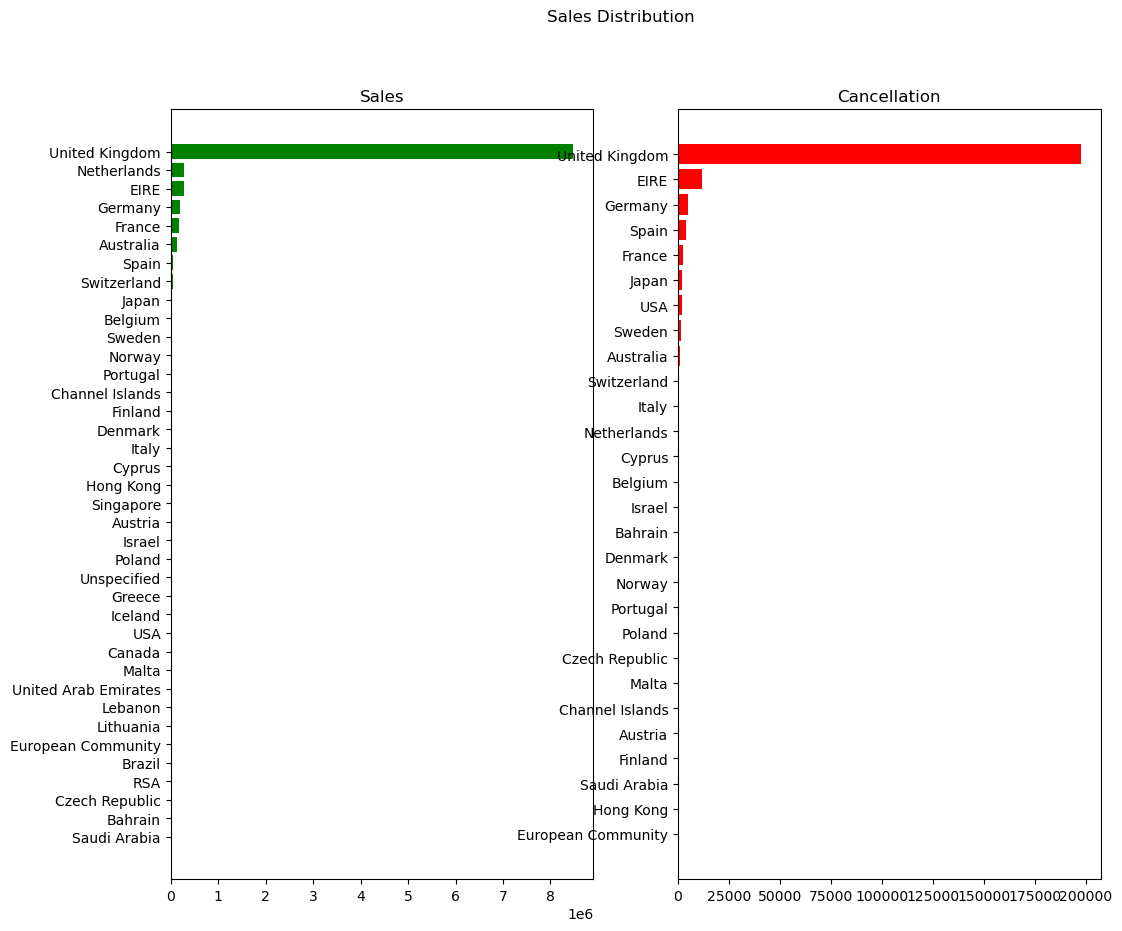

In [25]:
df_temp = df_sales_filter.groupby("Country")["TotalPrice"].sum().sort_values(ascending=True)
df_temp_2 = df_cancel_filter.groupby("Country")["TotalPrice"].sum().sort_values(ascending=False)

print("Country Distribution of Sales")
display(df_temp.iloc[::-1])

print("Country Distribution of Cancellation")
display(df_temp_2.iloc[::-1])

fig, axs = plt.subplots(1, 2, figsize=(12,10))
fig.suptitle("Sales Distribution")

axs[0].barh(df_temp.index, df_temp.values, color='g')
axs[1].barh(df_temp_2.index, -df_temp_2.values, color='r')

axs[0].set_title("Sales")
axs[1].set_title("Cancellation");

In [26]:
print("Number of countries with sales: {}".format(df_temp.shape[0]))
print("Ratio of UK Sales: {}".format( round(df_temp.iloc[-1] / df_temp.sum(), 2)))
print("Ratio of Netherlands, EIRE, Germany Sales: {}".format( round(df_temp.iloc[-4:-1] / df_temp.sum(), 3)))

Number of countries with sales: 38
Ratio of UK Sales: 0.85
Ratio of Netherlands, EIRE, Germany Sales: Country
Germany        0.021
EIRE           0.028
Netherlands    0.028
Name: TotalPrice, dtype: float64


The products were sold to **38** countries.

**85% of the customers are from the UK**, with 11% coming from neighbouring countries like Netherlands, EIRE and Germany.

However, the top countries with the most cancelled orders do not follow the trend of the top countries with sales, with Spain, Japan, USA and Sweden being the priority countries for further investigation.

We will deep dive into UK due to its sheer market share.

##### UK Sales

In [27]:
uk_sales = df_sales_filter[df_sales_filter["Country"]=="United Kingdom"]

print("Top 10 products in UK")
display(uk_sales.groupby("StockCode")["Quantity"].sum().sort_values(ascending=False).reset_index().iloc[:10])

Top 10 products in UK


,StockCode,Quantity
0,22197,53320
1,84077,49430
2,85099B,44165
3,85123A,39495
4,84879,33636
5,22616,25315
6,21212,24963
7,22178,23663
8,17003,22768
9,15036,21066


### Sales Trend

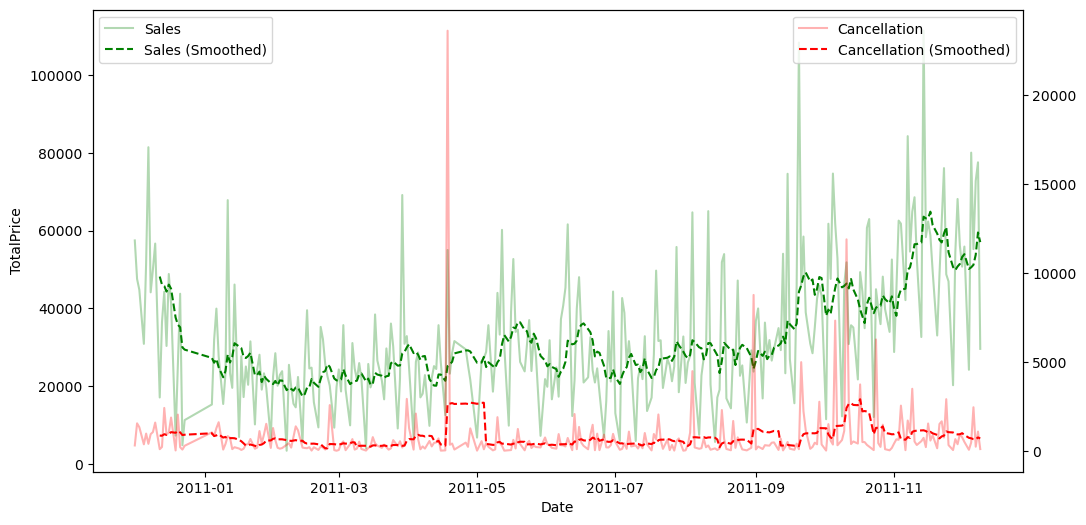

In [28]:
# Plot the sales trend

df_temp = df_sales_filter.copy()
df_temp["InvoiceDateOnly"] = df_temp['InvoiceDate'].dt.date
df_temp = df_temp.groupby("InvoiceDateOnly")[["TotalPrice"]].sum().reset_index()
df_temp['SmoothedPrice'] = df_temp['TotalPrice'].rolling(window=10).mean()

df_temp_2 = df_cancel_filter.copy()
df_temp_2["InvoiceDateOnly"] = df_temp_2['InvoiceDate'].dt.date
df_temp_2 = df_temp_2.groupby("InvoiceDateOnly")[["TotalPrice"]].sum().reset_index()
df_temp_2['SmoothedPrice'] = df_temp_2['TotalPrice'].rolling(window=10).mean()

fig, axs = plt.subplots(figsize=(12,6))

axs.plot(df_temp["InvoiceDateOnly"], df_temp["TotalPrice"], c='g', label="Sales", alpha=0.3)
axs.plot(df_temp["InvoiceDateOnly"], df_temp["SmoothedPrice"], c='g', label="Sales (Smoothed)", ls='--')

axs2 = axs.twinx()
axs2.plot(df_temp_2["InvoiceDateOnly"], -df_temp_2["TotalPrice"], c='r', label="Cancellation", alpha=0.3)
axs2.plot(df_temp_2["InvoiceDateOnly"], -df_temp_2["SmoothedPrice"], c='r', label="Cancellation (Smoothed)", ls='--')

axs.set_xlabel("Date")
axs.set_ylabel("TotalPrice")
axs.legend(loc="upper left")
axs2.legend(loc="upper right")

Despite fluctuation, The sales seem to show an increasing trend towards the end of the year, with a sharp increment starting around late September. The boost in sales gradually subsides when a new year begins.

However, the trend for order cancellation remains relatively constant, with a few major outliers in April, August and October.

### Find Purchase Patterns

#### Association Rules and Market Basket Analysis

Association rule allows us to study relationship among the products, for example, which products are often bought together. This could be used to inform sales strategy.

In [29]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [30]:
basket = df_sales_filter.pivot_table(index="InvoiceNo", columns="Description", values="Quantity").fillna(0)
basket = basket.astype(bool)

frequent_items = apriori(basket, min_support=0.02, use_colnames=True)

In [31]:
# Generate rules for products that are often purchased together
rules = association_rules(frequent_items, metric="lift", min_threshold=1)
rules = rules[['antecedents', 'consequents', 'antecedent support', 'confidence', 'lift']]
rules = rules.rename(columns={'antecedent support':'support'})

rules = rules.sort_values("lift", ascending=False)

rules.head(5)

,antecedents,consequents,support,confidence,lift
161,(PINK REGENCY TEACUP AND SAUCER),"(GREEN REGENCY TEACUP AND SAUCER, ROSES REGENC...",0.038384,0.707572,18.385811
156,"(GREEN REGENCY TEACUP AND SAUCER, ROSES REGENC...",(PINK REGENCY TEACUP AND SAUCER),0.038485,0.705729,18.385811
159,(GREEN REGENCY TEACUP AND SAUCER),"(ROSES REGENCY TEACUP AND SAUCER , PINK REGENC...",0.050862,0.533990,17.790163
158,"(ROSES REGENCY TEACUP AND SAUCER , PINK REGENC...",(GREEN REGENCY TEACUP AND SAUCER),0.030016,0.904841,17.790163
23,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.038384,0.826371,16.247345


The rules show the top product pairs that customer usually purchase together; **the higher the lift, the stronger the association is**. For example, GREEN REGENCY TEACUP AND SAUCER and ROSES REGENCY TEACUP AND SAUCER are usually purchased if PINK REGENCY TEACUP AND SAUCER is purchased, with the rule being true in **70.75%** of the transactions containing PINK REGENCY TEACUP AND SAUCER.

These findings can be used to provide recommendation of the the consequent products to the customers, or devise bundled promotion strategies to boost sales.

## Task 4: Devise Sales Strategy

### Recommendation System

Now that we have understood the sales patterns, can we build a tool to boost the sales by recommending products that the customers may be interested in?

In this section we will explore three recommendation models.

Reference taken:
1. https://www.kaggle.com/code/gspmoreira/recommender-systems-in-python-101#Collaborative-Filtering-model
2. https://towardsdatascience.com/item-based-collaborative-filtering-in-python-91f747200fab/
3. https://realpython.com/build-recommendation-engine-collaborative-filtering/#using-python-to-build-recommenders



In [32]:
# Find the purchase records of each customer for recommendation

df_temp = df_sales_filter[["StockCode", "CustomerID", "Quantity"]]
df_temp = df_temp.dropna(subset="CustomerID")

# To evaluate our models, we will need to split the dataset into train and test sets

# The customers should contain at least 2 stocks for the train-test split
df_temp = df_temp.groupby("CustomerID").filter(lambda x: x["StockCode"].nunique() > 1) 

train_rows = []
test_rows = []
test_ratio = 0.2

# Group by CustomerID, make sure the train and test sets contain different products
for customer, group in df_temp.groupby('CustomerID'):
    unique_stocks = group['StockCode'].unique()
    
    # If only 1 stock, skip (can’t split stocks between train/test)
    if len(unique_stocks) < 2:
        continue
    
    # Shuffle and split stock codes
    np.random.seed(0)
    np.random.shuffle(unique_stocks)
    split_idx = int(len(unique_stocks) * (1 - test_ratio))
    train_stocks = unique_stocks[:split_idx]
    test_stocks = unique_stocks[split_idx:]
    
    # Split the rows
    train_rows.append(group[group['StockCode'].isin(train_stocks)])
    test_rows.append(group[group['StockCode'].isin(test_stocks)])
df_train = pd.concat(train_rows).reset_index(drop=True)
df_test = pd.concat(test_rows).reset_index(drop=True)

'''
# # Not doing this as it cannot guarantee the products in train and test sets are mutually exclusive
# df_train, df_test = train_test_split(df_temp,
#                                    stratify=df_temp['CustomerID'], 
#                                    test_size=0.2,
#                                    random_state=0)
'''

df_prod_cust = df_temp.pivot_table(index="StockCode", columns="CustomerID", values="Quantity", aggfunc="sum").fillna(0)
df_prod_cust_train = df_train.pivot_table(index="StockCode", columns="CustomerID", values="Quantity", aggfunc="sum").fillna(0)
df_prod_cust_test = df_test.pivot_table(index="StockCode", columns="CustomerID", values="Quantity", aggfunc="sum").fillna(0)

print(df_prod_cust.shape, df_prod_cust_train.shape, df_prod_cust_test.shape)

df_prod_cust

(3660, 4241) (3621, 4241) (3247, 4241)


CustomerID,12347,12348,12349,12350,12352,12353,12354,12355,12356,12357,...,18272,18274,18276,18277,18278,18280,18281,18282,18283,18287
StockCode,,,,,,,,,,,,,,,,,,,,,
10002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10080,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10123C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10124A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90214W,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90214Y,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90214Z,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
# # This code check whether for each customer, the train and test sets are not empty and the products are mutually exclusive
# for cid in df_prod_cust.columns:
#     train_id = df_prod_cust_train[df_prod_cust_train[cid] > 0][cid].index
#     test_id = df_prod_cust_test[df_prod_cust_test[cid] > 0][cid].index
#     train_id = set(train_id)
#     test_id = set(test_id)
#     # print(cid, train_id, test_id)
#     assert(len(train_id))
#     assert(len(test_id))
#     assert(len(train_id.intersection(test_id)) == 0)

In [34]:
# Get a unique description for each product by adopting the most common description
description_counts = df_sales_filter.groupby(['StockCode', 'Description']).size().reset_index(name='Count')
df_product = description_counts.sort_values('Count', ascending=False).drop_duplicates('StockCode')
df_product = df_product.drop("Count", axis=1)
df_product

,StockCode,Description
3790,85123A,WHITE HANGING HEART T-LIGHT HOLDER
3767,85099B,JUMBO BAG RED RETROSPOT
1399,22423,REGENCY CAKESTAND 3 TIER
2993,47566,PARTY BUNTING
192,20725,LUNCH BAG RED RETROSPOT
...,...,...
2732,23617,SET 10 CARDS SWIRLY XMAS TREE 17104
2741,23628,SET 10 CARDS TRIANGLE ICONS 17220
2753,23643,SET 10 CARDS CHRISTMAS BAUBLE 16954
2759,23652,SET 10 CARD CHRISTMAS STAMPS 16963


##### Populatrity Model

This model finds the most popular item to recommend to the customers. This should be the default model for all new users as we have little to none purchase history.

In [35]:
# Find the total sales of the products

df_popular = df_prod_cust_train.sum(axis=1).sort_values(ascending=False).reset_index()
df_popular = df_popular.rename(columns={0:"Quantity"})

df_popular = pd.merge(df_popular, df_product, on="StockCode")
df_popular

,StockCode,Quantity,Description
0,85099B,39877.0,JUMBO BAG RED RETROSPOT
1,22197,34663.0,POPCORN HOLDER
2,84077,34338.0,WORLD WAR 2 GLIDERS ASSTD DESIGNS
3,85123A,30815.0,WHITE HANGING HEART T-LIGHT HOLDER
4,84879,29646.0,ASSORTED COLOUR BIRD ORNAMENT
...,...,...,...
3616,84551,1.0,CROCHET DOG KEYRING
3617,23664,1.0,FLOWER SHOP DESIGN MUG
3618,23630,1.0,SET 10 CARDS HANGING BAUBLES 17080
3619,84562A,1.0,PINK/WHITE RIBBED MELAMINE JUG


In [36]:
class PopularityRecommender:
    
    def __init__(self, df_popular, df_prod_cust):
        self.df_popular = df_popular
        self.df_prod_cust = df_prod_cust
        self.model_name = 'Popularity'
        
    def get_model_name(self):
        return self.model_name
        
    def recommend_items(self, customer_id=None, topn=10):
        # Recommend the more popular items that the user hasn't seen yet.
        if customer_id and customer_id in self.df_prod_cust.columns:
            purchased_product = self.df_prod_cust[self.df_prod_cust[customer_id] != 0].index
            # print(purchased_product)
        else:
            purchased_product = []
        
        df_recommedations = self.df_popular[~self.df_popular['StockCode'].isin(purchased_product)] \
                               .sort_values('Quantity', ascending=False) \
                               .head(topn)
        
        df_recommedations = df_recommedations.drop("Quantity", axis=1)

        return df_recommedations
    
popularity_model = PopularityRecommender(df_popular, df_prod_cust_train)

In [37]:
print("Top 10 items recommended to new user")
display(popularity_model.recommend_items())

cid = "14047"
print("Items purchased by user ".format(cid), df_prod_cust[df_prod_cust[cid] != 0].index.tolist())
print("Top 10 items recommended to user ".format(cid))
display(popularity_model.recommend_items(customer_id=cid))

Top 10 items recommended to new user


,StockCode,Description
0,85099B,JUMBO BAG RED RETROSPOT
1,22197,POPCORN HOLDER
2,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS
3,85123A,WHITE HANGING HEART T-LIGHT HOLDER
4,84879,ASSORTED COLOUR BIRD ORNAMENT
5,21212,PACK OF 72 RETROSPOT CAKE CASES
6,21977,PACK OF 60 PINK PAISLEY CAKE CASES
7,22492,MINI PAINT SET VINTAGE
8,17003,BROCADE RING PURSE
9,21915,RED HARMONICA IN BOX


Items purchased by user  ['21481', '21754', '22120', '22139', '22294', '22328', '22367', '22467', '22618', '22634', '22752', '22781', '22837', '22840', '22841', '22898', '23206', '23207', '82484', '84077', '84792', '85123A']
Top 10 items recommended to user 


,StockCode,Description
0,85099B,JUMBO BAG RED RETROSPOT
1,22197,POPCORN HOLDER
4,84879,ASSORTED COLOUR BIRD ORNAMENT
5,21212,PACK OF 72 RETROSPOT CAKE CASES
6,21977,PACK OF 60 PINK PAISLEY CAKE CASES
7,22492,MINI PAINT SET VINTAGE
8,17003,BROCADE RING PURSE
9,21915,RED HARMONICA IN BOX
10,22178,VICTORIAN GLASS HANGING T-LIGHT
11,22616,PACK OF 12 LONDON TISSUES


##### Neighbourhood-based Filtering

This model recommends similar products to the ones a customer has purchased before.

In [38]:
df_prod_cust_cpy = df_prod_cust_train.copy()

# Set 1 if the user purchase this before
# Use this instead of raw quantity in finding similarity as we are more interested in accessing their purchase history rather than purchase quantity
df_prod_cust_cpy = df_prod_cust_cpy.astype(bool)
df_prod_cust_cpy = df_prod_cust_cpy.astype(int)

# Find the nearest neighbours based on cosine similarity
k = 100
knn = NearestNeighbors(metric='cosine', algorithm='brute') # default n=5 closest neighbours
knn.fit(df_prod_cust_cpy.values)
distances, indices = knn.kneighbors(df_prod_cust_cpy.values, n_neighbors=k)

# Similarity = 0-1, with 1 being 100% similar
similarity = 1 - distances

# Convert the indices into a df so that we can refer easily
converted = [[df_prod_cust_cpy.index.tolist()[i] for i in inner_list] for inner_list in indices]
df_similar_products = pd.DataFrame(converted, index=df_prod_cust_cpy.index)
df_similar_products

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
StockCode,,,,,,,,,,,,,,,,,,,,,
10002,10002,90059B,16010,90103,85017C,21439,90059F,90101,90059E,21507,...,90204,16169K,23230,21358,22972,22127,22212,22712,21452,22356
10080,10080,90206A,90214F,79157B,23694,21373,21189,35599D,84826,84012,...,81952B,84360,22984,20992,22621,22066,85130B,16218,23339,47593A
10120,10120,16237,20986,84206A,21026,90152B,90128B,84732B,62096B,35647,...,84596B,21034,22586,22608,23120,16235,84849D,21069,22305,22093
10123C,10123C,22874,79071B,22202,85197,22289,20707,85016,35924,20856,...,22151,23333,23309,20676,47566B,22296,21122,23308,23332,84692
10124A,10124A,21228,21018,22878,84683,84466,20755,85095,22104,71403,...,15036,22352,23309,22540,22336,22230,23191,21201,10125,23347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90214W,90214O,90214Z,90214W,90214T,90214F,90214B,90214V,90214H,90214N,90214G,...,35095B,35241,35265,35271S,35400,35443,35471D,35591T,35001G,37333
90214Y,90214Y,22323,84968B,90093,84675,90214H,90214V,90214B,90214J,21827,...,22135,20618,85064,21562,21427,20659,20617,85114A,20652,20773
90214Z,90214O,90214Z,90214W,90214T,90214F,90214B,90214V,90214H,90214N,90214G,...,35095B,35241,35265,35271S,35400,35443,35471D,35591T,35001G,37333


In [39]:
# Find the similar products of a certain stock
stock_code = "10120"
stock_idx = df_prod_cust_cpy.index.tolist().index(stock_code)

print("Products that are similar to {}".format(stock_code))
for idx in indices[stock_idx]:
    print(df_prod_cust_cpy.index[idx])

Products that are similar to 10120
10120
16237
20986
84206A
21026
90152B
90128B
84732B
62096B
35647
21839
84569C
20657
16258A
84006
21807
21722
16216
16225
21030
22536
16236
16169P
79161A
20861
79151B
84201B
47574B
20773
90149
90151
90103
90059B
44242B
17007B
90211A
22566
84877D
23505
20700
84732D
90195B
44089A
84731
37468
90155
90177B
16010
21990
22992
72127
47594B
22610
84519A
23365
22535
84012
20963
16054
22758
21070
22263
35933
23507
85071D
22705
23482
20967
23266
90101
85179A
90059E
90059F
90196B
90152A
21027
17174
90180B
23085
20661
21763
21785
35958
37444C
47422
21827
72709
90208
90184A
22991
84596B
21034
22586
22608
23120
16235
84849D
21069
22305
22093


The list of similar products can be recommended to customers after they bought a certain item.

In [40]:
class NeighbourhoodRecommender:
    
    def __init__(self, df_similar_products, df_prod_cust):
        self.df_similar_products = df_similar_products
        self.df_prod_cust = df_prod_cust
        self.model_name = 'Neighbourhood-based'
        
    def get_model_name(self):
        return self.model_name
        
    def recommend_items(self, customer_id, topn=10):
        # Recommend the similar items that the user hasn't purchase yet.

        assert(customer_id in self.df_prod_cust.columns)
        
        purchased_product = self.df_prod_cust[self.df_prod_cust[customer_id] != 0][customer_id]

        recommendation_scores = {}
        for stockcode, qty in purchased_product.items():
            if stockcode in self.df_similar_products.index:
                # Get similar products
                similar = self.df_similar_products.loc[stockcode].values
                for rank, similar_code in enumerate(similar):
                    # The more similar (lower rank), the higher quantity purchased, the higher the weight
                    weight = qty / (rank + 1)

                    if similar_code not in recommendation_scores:
                        recommendation_scores[similar_code] = 0
                    recommendation_scores[similar_code] += weight

        df_recommedations = pd.DataFrame(recommendation_scores.items(), columns=["StockCode", "Score"]).sort_values("Score", ascending=False)
        df_recommedations = df_recommedations[~df_recommedations["StockCode"].isin(purchased_product.index)]
        df_recommedations = df_recommedations.head(topn)

        return df_recommedations

neighbourhood_model = NeighbourhoodRecommender(df_similar_products, df_prod_cust_train)

In [41]:
cid = "12855"

print("Items purchased by Customer {}".format(cid))
print(df_sales_filter[df_sales_filter["CustomerID"]==cid]["StockCode"].values)
print("Top 10 products to recommend to this customers are:")
display(neighbourhood_model.recommend_items(cid))

Items purchased by Customer 12855
['22863' '22962' '22963']
Top 10 products to recommend to this customers are:


,StockCode,Score
2,22961,8.000000
3,22720,5.000000
7,23236,3.900000
13,22960,3.857143
4,22722,3.733333
5,22980,3.200000
6,22989,2.805195
9,22907,2.700000
14,23307,2.514286
8,23240,2.083333


##### Collaborative Filtering Model

In [42]:
df_prod_cust_cpy = df_prod_cust_train.copy()

# Set 1 if the user purchase this before
# Use this instead of raw quantity as we are more interested in accessing their purchase history rather than purchase quantity
df_prod_cust_cpy = df_prod_cust_cpy.astype(bool)
df_prod_cust_cpy = df_prod_cust_cpy.astype(float)

df_prod_cust_sparse = csr_matrix(df_prod_cust_cpy)

#The number of factors to factor the user-item matrix.
NUMBER_OF_FACTORS_MF = 15

#Performs matrix factorization of the original user item matrix
U, sigma, Vt = svds(df_prod_cust_sparse, k = NUMBER_OF_FACTORS_MF)
sigma = np.diag(sigma)

print(U.shape, Vt.shape, sigma.shape)

# Reconstruct the matrix, which gives the prediction whether the customer will purchase the product
# (0: unlikely to purchase, 1: very likely to purchase)
df_prod_cust_pred = np.dot(np.dot(U, sigma), Vt) 
df_prod_cust_pred = pd.DataFrame(df_prod_cust_pred, columns = df_prod_cust_train.columns, index=df_prod_cust_train.index)

(3621, 15) (15, 4241) (15, 15)


In [43]:
class CFRecommender:
    
    def __init__(self, df_pred, df_prod_cust):
        self.df_pred = df_pred
        self.df_prod_cust = df_prod_cust
        self.model_name = 'Collaborative Filtering'
        
    def get_model_name(self):
        return self.model_name
        
    def recommend_items(self, customer_id, topn=10, verbose=False):
        # Get and sort the user's predictions
        sorted_user_predictions = self.df_pred[customer_id].sort_values(ascending=False) \
                                    .reset_index().rename(columns={customer_id: 'recStrength'})
        
        if customer_id in self.df_prod_cust.columns:
            purchased_product = self.df_prod_cust[self.df_prod_cust[customer_id] != 0].index
            # print(purchased_product)
        
        # Recommend the highest predicted rating movies that the user hasn't seen yet.
        recommendations_df = sorted_user_predictions[~sorted_user_predictions['StockCode'].isin(purchased_product)] \
                               .sort_values('recStrength', ascending = False) \
                               .head(topn)

        return recommendations_df
    
cf_recommender_model = CFRecommender(df_prod_cust_pred, df_prod_cust_cpy)

In [44]:
cid = "12347"

print("Items purchased by Customer {}".format(cid))
print(df_sales_filter[df_sales_filter["CustomerID"]==cid]["StockCode"].values)
print("Top 10 products to recommend to this customers are:")
display(cf_recommender_model.recommend_items(cid))

Items purchased by Customer 12347
['85116' '22375' '71477' '22492' '22771' '22772' '22773' '22774' '22775'
 '22805' '22725' '22726' '22727' '22728' '22729' '22212' '85167B' '21171'
 '22195' '84969' '84997C' '84997B' '84997D' '22494' '22497' '85232D'
 '21064' '21731' '84558A' '20780' '20782' '84625A' '84625C' '85116'
 '20719' '22375' '22376' '20966' '22725' '22726' '22727' '22728' '22729'
 '22196' '84992' '84991' '21976' '22417' '47559B' '21154' '21041' '21035'
 '22423' '84969' '22134' '21832' '22422' '22497' '21731' '84558A' '22376'
 '22374' '22371' '22375' '20665' '23076' '21791' '22550' '23177' '22432'
 '22774' '22195' '22196' '21975' '21041' '22423' '22699' '21731' '22492'
 '84559A' '84559B' '16008' '22821' '22497' '23084' '23162' '23171' '23172'
 '23170' '23173' '23174' '23175' '22371' '22375' '85178' '17021' '23146'
 '22196' '84558A' '51014C' '22727' '22725' '23308' '23297' '22375' '22374'
 '22376' '22371' '22372' '21578' '20719' '22727' '23146' '23147' '47559B'
 '84992' '84991' '

,StockCode,recStrength
1,22699,0.561665
4,23245,0.353134
6,22727,0.348089
8,23170,0.332215
9,23171,0.321861
10,23175,0.303859
14,47566,0.251282
17,22730,0.224777
18,22630,0.224111
20,22659,0.209044


##### Compare The Models

In [45]:
#Top-N accuracy metrics consts
EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS = 100

class ModelEvaluator:
    def get_not_interacted_items_sample(self, person_id, purchased_product, sample_size, seed=42):
        all_items = set(df_prod_cust.index)
        non_interacted_items = all_items - set(purchased_product)

        random.seed(seed)
        # Need to convert to list for deterministic results
        non_interacted_items = list(non_interacted_items)
        non_interacted_items.sort()

        non_interacted_items_sample = random.sample(non_interacted_items, sample_size)
        
        return set(non_interacted_items_sample)

    def _verify_hit_top_n(self, item_id, recommended_items, topn):        
            try:
                index = next(i for i, c in enumerate(recommended_items) if c == item_id)
            except:
                index = -1
            hit = int(index in range(0, topn))
            return hit, index

    def evaluate_model_for_user(self, model, customer_id):
        purchased_product_test = df_prod_cust_test[df_prod_cust_test[customer_id] != 0][customer_id].index
        interacted_items_count_test = len(purchased_product_test)

        # Getting a ranked recommendation list from a model for a given user
        # Our aim is to see if the model ranks the items purchased in the test set high
        person_recs_df = model.recommend_items(customer_id, topn=10000)

        hits_at_5_count = 0
        hits_at_10_count = 0
        # For each item the user has interacted in test set
        for i, item_id in enumerate(purchased_product_test):
            # Getting a random sample (100) items the user has not interacted 
            # (to represent items that are assumed to be no relevant to the user)
            non_interacted_items_sample = self.get_not_interacted_items_sample(customer_id, purchased_product_test,
                                                                          sample_size=EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS, 
                                                                          seed=i)
            # Combining the current interacted item with the 100 random items
            items_to_filter_recs = non_interacted_items_sample.union(set([item_id]))

            # Filtering only recommendations that are either the interacted item or from a random sample of 100 non-interacted items
            valid_recs_df = person_recs_df[person_recs_df['StockCode'].isin(items_to_filter_recs)]                    
            valid_recs = valid_recs_df['StockCode'].values

            # Verifying if the current interacted item is among the Top-N recommended items
            hit_at_5, index_at_5 = self._verify_hit_top_n(item_id, valid_recs, 5)
            hits_at_5_count += hit_at_5
            hit_at_10, index_at_10 = self._verify_hit_top_n(item_id, valid_recs, 10)
            hits_at_10_count += hit_at_10

        # Recall is the rate of the interacted items that are ranked among the Top-N recommended items, 
        # when mixed with a set of non-relevant items
        recall_at_5 = hits_at_5_count / float(interacted_items_count_test)
        recall_at_10 = hits_at_10_count / float(interacted_items_count_test)

        person_metrics = {'hits@5_count':hits_at_5_count, 
                          'hits@10_count':hits_at_10_count, 
                          'interacted_count': interacted_items_count_test,
                          'recall@5': recall_at_5,
                          'recall@10': recall_at_10}
        return person_metrics

    def evaluate_model(self, model):
        people_metrics = []
        # Loop through every test customers
        for idx, customer_id in enumerate(list(df_prod_cust_test.columns)):
            #if idx % 100 == 0 and idx > 0:
            #    print('%d users processed' % idx)
            person_metrics = self.evaluate_model_for_user(model, customer_id)  
            person_metrics['customer_id'] = customer_id
            people_metrics.append(person_metrics)

            # if idx > 100:
            #     break
        print('%d users processed' % idx)

        detailed_results_df = pd.DataFrame(people_metrics) \
                            .sort_values('interacted_count', ascending=False)
        
        global_recall_at_5 = detailed_results_df['hits@5_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        global_recall_at_10 = detailed_results_df['hits@10_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        
        global_metrics = {'model': model.get_model_name(),
                          'recall@5': global_recall_at_5,
                          'recall@10': global_recall_at_10}    
        return global_metrics, detailed_results_df
    
model_evaluator = ModelEvaluator()    

In [46]:
metrics_popularity, df_result_popularity = model_evaluator.evaluate_model(popularity_model)

4240 users processed


In [47]:
metrics_neighbourhood, df_result_neighbourhood = model_evaluator.evaluate_model(neighbourhood_model)

4240 users processed


In [48]:
metrics_cf, df_result_cf = model_evaluator.evaluate_model(cf_recommender_model)

4240 users processed


In [49]:
df_metrics = pd.DataFrame([metrics_popularity, metrics_neighbourhood, metrics_cf]) \
                        .set_index('model')
df_metrics

,recall@5,recall@10
model,,
Popularity,0.238360,0.385473
Neighbourhood-based,0.493381,0.641040
Collaborative Filtering,0.447111,0.596263


The results show that the **Neighbourhood-based Model** perform the best, with a **recall@5 score of 0.49**, meaning that 49% of the time the item a user has chosen was among the top 5 recommendations made by the model. While the Popularity Model does not perform as well, it can serve as a default recommender for customers with no or little purchase history data.